# Q1. What is multithreading in python? Why is it used? Name the module used to handle threads in python.

Multithreading in Python refers to the concurrent execution of multiple threads (smaller units of a process) within the same program. Each thread operates independently and can perform separate tasks concurrently, sharing the same resources like memory space. Python's 'threading' module provides a way to create and manage threads in a program.

Threads are used to achieve parallelism in Python, allowing multiple tasks to be executed concurrently. This is particularly useful when dealing with tasks that can be performed independently and don't rely on each other's results. Common use cases for multithreading include improving the responsiveness of graphical user interfaces (GUIs), handling multiple network connections simultaneously, and parallelizing CPU-bound tasks.

You can use this module to create and manage threads, synchronize access to resources, and coordinate the execution of threads. The threading module provides a Thread class, which can be subclassed to create new threads, and various synchronization primitives like Locks and Semaphores to coordinate access to shared resources among threads.

# Q2.  Why threading module used? Write the use of the following functions: 1. activeCount() 2. currentThread() 3. enumerate()


The threading module in Python is used for creating, managing, and synchronizing threads. It provides a higher-level interface for working with threads compared to the lower-level _thread module.

1. threading.active_count(): Return the number of Thread objects currently alive. The returned count is equal to the length of the list returned by enumerate().

2. threading.current_thread(): Return the current Thread object, corresponding to the caller’s thread of control. If the caller’s thread of control was not created through the threading module, a dummy thread object with limited functionality is returned.

3. threading.enumerate(): Return a list of all Thread objects currently active. The list includes daemonic threads and dummy thread objects created by current_thread(). It excludes terminated threads and threads that have not yet been started. However, the main thread is always part of the result, even when terminated.

In [ ]:
import threading

def print_current_thread():
    current_thread = threading.current_thread()
    print('Current Thread:' , current_thread.name)

thread1 = threading.Thread(target=print_current_thread, name = 'Thread-1')
thread2 = threading.Thread(target=print_current_thread, name = 'Thread-2')

thread1.start()
thread2.start()

# Wait for both threads to finish
thread1.join()
thread2.join()

print("Number of active threads:", threading.active_count())
print(threading.enumerate())

Current Thread: Thread-1
Current Thread: Thread-2
Number of active threads: 5
[<_MainThread(MainThread, started 140542744305664)>, <Thread(Thread-2 (_thread_main), started daemon 140542680032832)>, <Heartbeat(Thread-3, started daemon 140542604211776)>, <ParentPollerUnix(Thread-1, started daemon 140542359365184)>, <Thread(_colab_inspector_thread, started daemon 140541849228864)>]


# Q3. Explain the following functions: 1. run() 2.start() 3. join() 4.isAlive()

1. run(): Method representing the thread’s activity. When a Thread object is created, its run() method is called when the start() method is invoked.

In [1]:
import threading

class MyThread(threading.Thread):
    def run(self):
        print("Executing thread")

my_thread = MyThread()
my_thread.start()  # This will invoke the run() method

Executing thread


2. start(): Start the thread’s activity. It must be called at most once per thread object. It arranges for the object’s run() method to be invoked in a separate thread of control. This method will raise a RuntimeError if called more than once on the same thread object.

In [9]:
import threading

def my_function():
    print("Executing my_function")

my_thread = threading.Thread(target=my_function)
my_thread.start()

Executing my_function


3. join(): The join() method is used to wait for the thread to complete its execution. If a program has multiple threads, the join() method can be used to ensure that the main program waits for all threads to finish before it continues execution.

In [6]:
import threading
import time

start = time.perf_counter()

def my_function():
    print("Sleeping for 2 seconds")
    time.sleep(2)

my_thread = threading.Thread(target=my_function)
my_thread.start()

# The main program will wait for my_thread to finish before continuing
my_thread.join()

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 3)} second(s)')

Sleeping for 2 seconds
Finished in 2.006 second(s)


4. is_alive(): Return whether the thread is alive. This method returns True just before the run() method starts until just after the run() method terminates. The module function enumerate() returns a list of all alive threads.

In [7]:
import threading
import time

def func():
  time.sleep(2)

thread = threading.Thread(target = func)
thread.start()

print('Is the thread alive? ', thread.is_alive())

thread.join()

print('Is the thread alive? ', thread.is_alive())

Is the thread alive?  True
Is the thread alive?  False


# Q4. Write a python program to create two threads. Thread one must print the list of squares and thread two must print the list of cubes.

In [15]:
import threading

def squared(squares):

  for square in squares:
    print(square**2)

def cubed(cubes):
  for cube in cubes:
    print(cube**3)

nums = [1,2,3,4,5]

t1 = threading.Thread(target = squared, args = (nums,))
t2 = threading.Thread(target = cubed, args = (nums,))

t1.start()
t2.start()

t1.join()
t2.join()


1
4
9
16
25
1
8
27
64
125


# Q5. State advantages and disadvantages of multithreading.

Advantages:

1. Responsiveness – Multithreading in an interactive application may allow a program to continue running even if a part of it is blocked or is performing a lengthy operation, thereby increasing responsiveness to the user. In a non multi threaded environment, a server listens to the port for some request and when the request comes, it processes the request and then resume listening to another request. The time taken while processing of request makes other users wait unnecessarily.

2. Resource Sharing – Processes may share resources only through techniques such as-
Message Passing
Shared Memory

3. Scalability – The benefits of multi-programming greatly increase in case of multiprocessor architecture, where threads may be running parallel on multiple processors. If there is only one thread then it is not possible to divide the processes into smaller tasks that different processors can perform.

Disadvantages:

1. With more threads, the code becomes difficult to debug and maintain.

2. Thread creation puts a load on the system in terms of memory and CPU resources.

3. We need to do exception handling inside the worker method as any unhandled exceptions can result in the program crashing.

# Q6. Explain deadlocks and race conditions.

Race condition: When two processes are competing with each other causing data corruption.




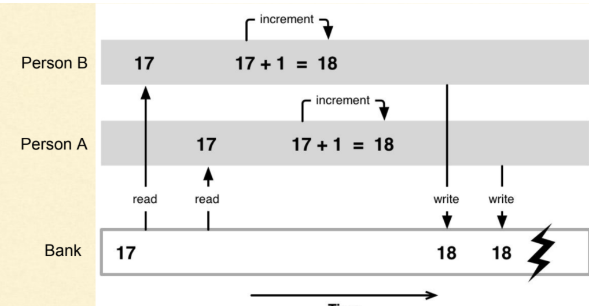

As shown in the diagram, two persons are trying to deposit 1 dollar online into the same bank account. The initial amount is 17 dollar. Both the persons would be able to see 17 initially. Each of them tries to deposit 1, and the final amount is expected to be 19. But due to race conditions, the final amount in the bank is 18 instead of 19. This is also known as dirty read.

For example, if two processes/threads are trying to execute the following conditions simultaneously, they cause data corruption:

Thread 1:
total = num1 + num2

Thread 2:
total = num1 - num2

Deadlock:

When two processes are waiting for each other directly or indirectly, it is called deadlock.

This usually occurs when two processes are waiting for shared resources acquired by others. For example, If thread T1 acquired resource R1 and it also needs resource R2 for it to accomplish its task. But the resource R2 is acquired by thread T2 which is waiting for resource R1(which is acquired by T1).. Neither of them will be able to accomplish its task, as they keep waiting for the other resources they need.

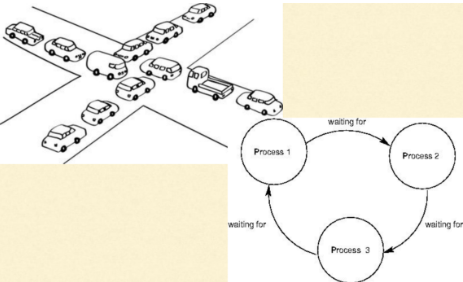

As you can see in the second diagram, process 1 is waiting for process 2 and process 2 is waiting for process 3 to finish and process 3 is waiting for process 1 to finish. All these three processes would keep waiting and will never end. This is called deadlock.